### Twitter disaster prediction

https://www.kaggle.com/c/nlp-getting-started/overview

Goal:  Predict whether a tweet is about a real disaster or not

Aim: 1 stand for real disaster while 0 indicates not likely to be real in my submission file.

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

Importing data from data folder as provided by kaggle. The dataset was downloaded from Twitter by Kaggle.

In [2]:
train = pd.read_csv('data/train.csv', index_col='id')
train['keyword'] = train['keyword'].str.replace('%20', ' ').fillna('')

y = train.pop('target')

In [3]:
test = pd.read_csv('data/test.csv', index_col='id')
test['keyword'] = test['keyword'].str.replace('%20', ' ').fillna('')

Perusing the dataset.

In [4]:
train.head()

,keyword,location,text
id,,,
1,,NaN,Our Deeds are the Reason of this #earthquake M...
4,,NaN,Forest fire near La Ronge Sask. Canada
5,,NaN,All residents asked to 'shelter in place' are ...
6,,NaN,"13,000 people receive #wildfires evacuation or..."
7,,NaN,Just got sent this photo from Ruby #Alaska as ...


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 1 to 10873
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7613 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
dtypes: object(3)
memory usage: 237.9+ KB


In [6]:
y.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
train['location'].nunique()

3341

In [8]:
train['keyword'].nunique()

222

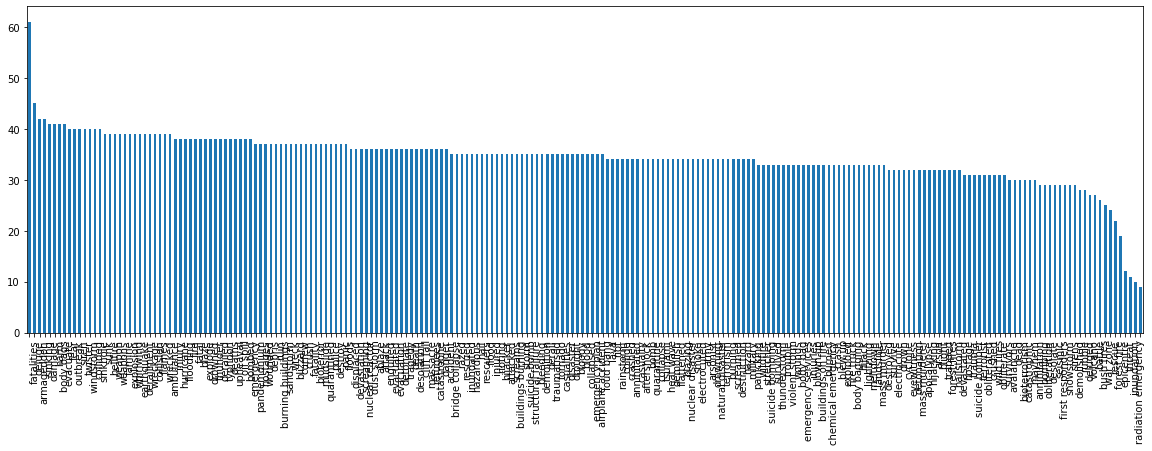

In [9]:
train['keyword'].value_counts().plot.bar(figsize=(20, 6));

I used Sklearn to train and test the dataset as well as make prediction.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=17)

In [12]:
len(X_train), len(y_train)

(6090, 6090)

In [13]:
pipe = GridSearchCV(
    Pipeline([
        ('features', ColumnTransformer([
            ('tweet_text', TfidfVectorizer(), 'text'),
            ('keyword', TfidfVectorizer(), 'keyword')
        ])),
    ('classifier', LogisticRegression(max_iter=300))
    ]), cv=5, param_grid={'classifier__C': np.logspace(-3,2,10)}
)

In [14]:
pipe.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features',
                                        ColumnTransformer(transformers=[('tweet_text',
                                                                         TfidfVectorizer(),
                                                                         'text'),
                                                                        ('keyword',
                                                                         TfidfVectorizer(),
                                                                         'keyword')])),
                                       ('classifier',
                                        LogisticRegression(max_iter=300))]),
             param_grid={'classifier__C': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02])})

In [15]:
pipe.predict(train)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [16]:
pipe.score(X_train, y_train)

0.9192118226600985

In [17]:
pipe.score(X_test, y_test)

0.7997373604727511

Result of the Prediction is saved as submission file in data folder.

In [18]:
filetime = datetime.now().strftime('%Y%m%d-%H%M')

submission = pd.DataFrame({'id': test.index, 'target': pipe.predict(test)}).set_index('id').sort_index()

submission.to_csv('data/submission' + filetime + '.csv')